In [1]:
# 读取probs reusuls
# 读取对应的question以及responses
import pandas as pd
df = pd.read_parquet("./results/sub_1000_openr1_Qwen-Math-7B_acc.parquet")
responses = df['target'].tolist()
responses = [r[0]['content'] for r in responses]

import numpy as np
probs = np.load('./results/sub_1000_probs_results.npy', allow_pickle=True)

In [3]:
df.index = list(range(len(df)))

In [4]:
df.head()

,data_source,prompt,target,ability,reward_model,extra_info,accs,answers
0,olympiads,[{'content': 'Your task is to follow a systema...,"[{'content': '<think> Alright, let's tackle th...",,"{'ground_truth': '0', 'style': 'rule'}","{'index': -1, 'split': 'default'}",1.000,"[{'correctness': True, 'generated_text': ' The..."
1,olympiads,[{'content': 'Your task is to follow a systema...,"[{'content': '<think> Okay, so I need to find ...",,"{'ground_truth': '45', 'style': 'rule'}","{'index': -1, 'split': 'default'}",0.875,"[{'correctness': True, 'generated_text': ' Th..."
2,olympiads,[{'content': 'Your task is to follow a systema...,"[{'content': '<think> Okay, let's see. I need ...",,"{'ground_truth': '5', 'style': 'rule'}","{'index': -1, 'split': 'default'}",1.000,"[{'correctness': True, 'generated_text': ' No..."
3,olympiads,[{'content': 'Your task is to follow a systema...,"[{'content': '<think> Alright, let's tackle th...",,"{'ground_truth': '0.75', 'style': 'rule'}","{'index': -1, 'split': 'default'}",0.125,"[{'correctness': False, 'generated_text': ' N..."
4,olympiads,[{'content': 'Your task is to follow a systema...,"[{'content': '<think> Okay, let's see. So the ...",,"{'ground_truth': '34', 'style': 'rule'}","{'index': -1, 'split': 'default'}",0.000,"[{'correctness': False, 'generated_text': ' T..."


In [15]:
# 划分为3个区间
# hard acc=0
# mid 1/8<=acc<=5/8
# easy acc>=6/8

sub_df = df[df['accs'] == 0]
sub_df = df[(df['accs'] >= 1/8) & (df['accs'] <= 5/8)]
sub_df = df[df['accs'] >= 6/8]

indexes = sub_df.index.tolist()
sub_probs = probs[indexes]

In [16]:
from collections import defaultdict

# 统计每个 token 的总概率和出现次数
token_stats = defaultdict(lambda: {'total_prob': 0, 'count': 0})

for sublist in sub_probs:
    for token, prob in sublist:
        token = token.replace("Ġ","")
        token_stats[token]['total_prob'] += prob
        token_stats[token]['count'] += 1

# 统计出现次数超过1000的 token 的平均概率
avg_probs = {token: stat['total_prob'] / stat['count'] for token, stat in token_stats.items() if token_stats[token]['count']>=1000}

# 转换为列表并按平均概率排序
sorted_avg_probs = sorted(avg_probs.items(), key=lambda x: x[1], reverse=True)

# 输出结果
#print("所有 token 的平均概率：")
#for token, avg_prob in sorted_avg_probs:
#    print(f"{token}: {avg_prob:.4f}")

# 展示高概率和低概率的 token
num_extremes = 50  # 展示前 N 个高概率和后 N 个低概率
high_prob_tokens = sorted_avg_probs[:num_extremes]
low_prob_tokens = sorted_avg_probs[-num_extremes:]

print("\n高概率 token：")
for token, avg_prob in high_prob_tokens:
    print(f"{token}: {avg_prob:.4f}")

print("\n低概率 token：")
for token, avg_prob in low_prob_tokens:
    print(f"{token}: {avg_prob:.4f}")

# 对于所有高频词
# 在高概率token中，大部分是数学符号
# 在低概率token中，大部分是转折词、逻辑词 -> 更值得模型去学的一些tokens


高概率 token：
}{: 0.9880
{: 0.9769
frac: 0.9746
_: 0.9679
[Ċ: 0.9649
0: 0.9569
2: 0.9478
}: 0.9456
^: 0.9447
9: 0.9394
3: 0.9388
Â²: 0.9374
8: 0.9365
5: 0.9352
(\: 0.9347
6: 0.9274
4: 0.9270
1: 0.9253
7: 0.9246
b: 0.9236
+: 0.9220
/: 0.9178
ÏĢ: 0.9156
\: 0.9093
(x: 0.9050
z: 0.9023
): 0.8991
-: 0.8931
c: 0.8930
y: 0.8901
^{: 0.8778
B: 0.8728
: 0.8714
=: 0.8702
)^: 0.8520
C: 0.8513
t: 0.8429
x: 0.8418
]ĊĊ: 0.8413
h: 0.8388
Ċ: 0.8387
sqrt: 0.8318
d: 0.8316
be: 0.8275
)/: 0.8271
n: 0.8243
p: 0.8192
of: 0.8192
by: 0.8173
\(: 0.8142

低概率 token：
[: 0.5849
the: 0.5822
).: 0.5565
from: 0.5503
find: 0.5492
not: 0.5189
both: 0.5120
as: 0.5108
two: 0.5080
must: 0.4852
so: 0.4846
then: 0.4779
it: 0.4736
problem: 0.4695
all: 0.4653
for: 0.4638
with: 0.4578
have: 0.4545
need: 0.4489
can: 0.4448
:ĊĊ: 0.4380
which: 0.4244
.ĊĊ: 0.4242
in: 0.4138
we: 0.4136
total: 0.4092
answer: 0.4073
?: 0.4038
each: 0.3928
So: 0.3901
that: 0.3884
this: 0.3538
there: 0.3448
Then: 0.3252
For: 0.3207
The: 0.3201
I: 0.3182


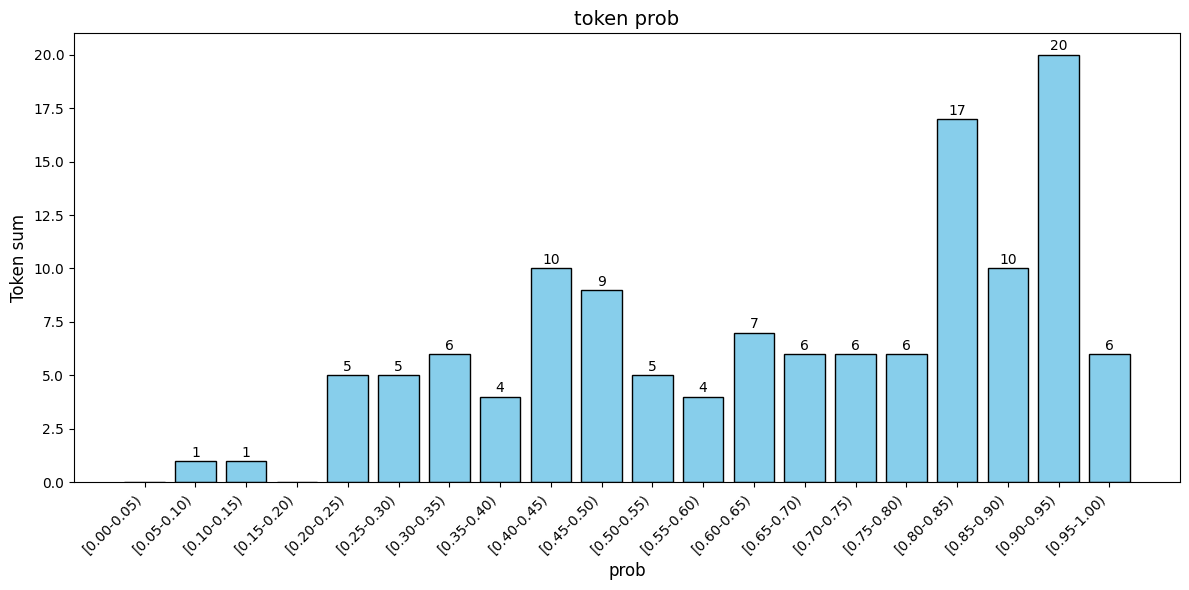

In [17]:
import matplotlib.pyplot as plt
from collections import defaultdict

# 定义概率区间（0-0.05, 0.05-0.1, ..., 0.95-1.0）
bins = [i * 0.05 for i in range(21)]  # [0.0, 0.05, 0.1, ..., 1.0]

# 统计每个区间的 token 数量
prob_distribution = defaultdict(int)

for token, prob in avg_probs.items():
    # 找到 prob 所属的区间
    for i in range(len(bins) - 1):
        if bins[i] <= prob < bins[i + 1]:
            prob_distribution[(bins[i], bins[i + 1])] += 1
            break

# 准备绘图数据
x_labels = [f"[{bins[i]:.2f}-{bins[i+1]:.2f})" for i in range(len(bins) - 1)]
y_values = [prob_distribution.get((bins[i], bins[i + 1]), 0) for i in range(len(bins) - 1)]

# 绘制条形图
plt.figure(figsize=(12, 6))
plt.bar(x_labels, y_values, color='skyblue', edgecolor='black')

# 添加标题和标签
plt.title("token prob", fontsize=14)
plt.xlabel("prob", fontsize=12)
plt.ylabel("Token sum", fontsize=12)
plt.xticks(rotation=45, ha='right')  # 旋转 x 轴标签

# 显示数值
for i, v in enumerate(y_values):
    if v > 0:
        plt.text(i, v + 0.2, str(v), ha='center')

plt.tight_layout()
plt.show()

# 对于所有高频词
# 出现的概率分布大致右偏
# 高频率的词语大部分都是高概率的词语

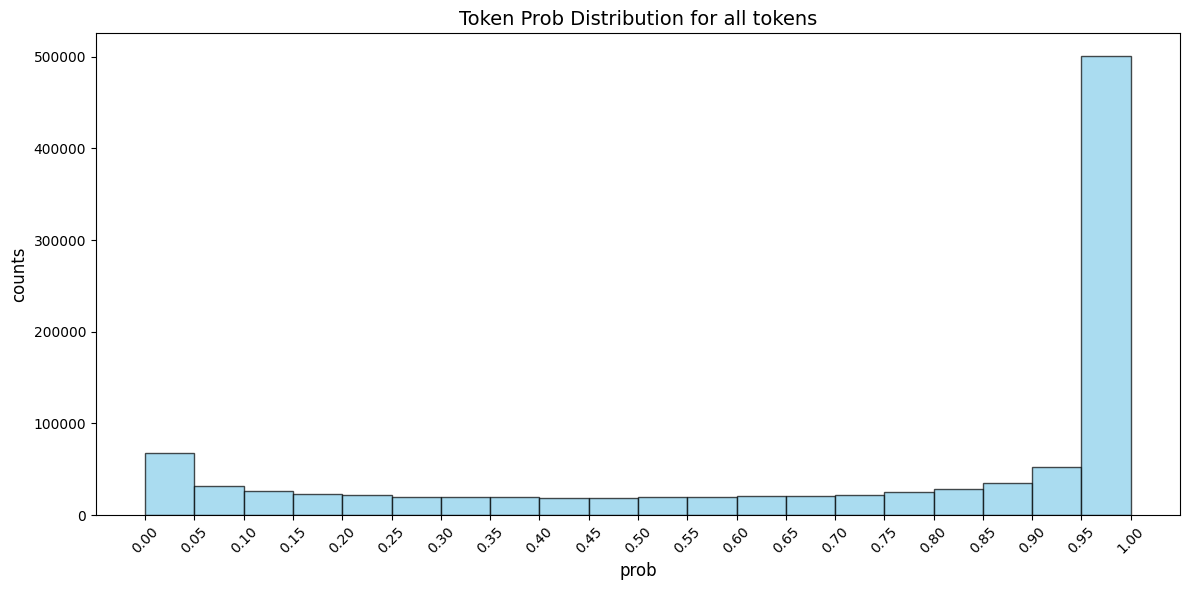

In [18]:
import matplotlib.pyplot as plt
from collections import defaultdict

# 提取所有 prob 值
all_probs = [prob for sublist in sub_probs for (token, prob) in sublist]

# 定义概率区间（0-0.05, 0.05-0.1, ..., 0.95-1.0）
bins = [i * 0.05 for i in range(21)]  # [0.0, 0.05, 0.1, ..., 1.0]

# 统计每个区间的 prob 数量
prob_distribution = defaultdict(int)

for prob in all_probs:
    for i in range(len(bins) - 1):
        if bins[i] <= prob < bins[i + 1]:
            prob_distribution[(bins[i], bins[i + 1])] += 1
            break

# 绘制直方图
plt.figure(figsize=(12, 6))
plt.hist(all_probs, bins=bins, edgecolor='black', alpha=0.7, color='skyblue')

# 添加标题和标签
plt.title("Token Prob Distribution for all tokens", fontsize=14)
plt.xlabel("prob", fontsize=12)
plt.ylabel("counts", fontsize=12)
plt.xticks(bins, rotation=45)  # 显示所有区间标签

plt.tight_layout()
plt.show()

# off_policy的绝大多数token是高概率的，右偏
# 所以如果直接按比例学习学到的其实都是这些高概率的token,会过分加强这些token,造成过拟合，这些数学知识已经被学过了
# 因此应该加强左边低概率的token